# Importing all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from statistics import median
import matplotlib.pyplot as plt
import warnings
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.set_option('max_columns', 600)
pd.set_option('max_rows', 600)
warnings.filterwarnings('ignore')

## Importing the train and test datafile into the workspace

In [3]:
df = pd.read_csv('../input/cuboulderdassahackathonclassification/training.csv')
test = pd.read_csv('../input/cuboulderdassahackathonclassification/testing.csv')

# Understanding the dataset

In [4]:
df.describe()

,id,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,10218.000000,10217.000000,10218.000000,1.021800e+04,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000
mean,5109.500000,0.382500,130212.992366,8.493614e+04,0.020608,0.014113,0.017787,0.018242,0.019000,0.018496,0.028254,0.025012,0.018248,0.021118,0.017707,0.015153,0.013653,0.016424,0.019901,0.023758,0.019104,0.011676,0.012941,0.012658,0.015749,0.008603,0.011628,0.017226,0.019051,0.018524,0.010534,0.014681,0.013208,0.015336,0.007143,0.009684,0.011100,0.015967,0.019386,0.019143,0.008237,0.018192,0.016183,0.019405,0.015525,0.022545,0.021968,0.007308,0.007605,0.011511,0.012197,0.028564,0.021567,0.007988,0.009652,0.006933,0.005407,0.009980,0.006448,0.024180,0.021161,0.028328,0.021685,0.001646,0.000597,0.006136
std,2949.826859,0.745726,124962.194019,7.967475e+05,0.020598,0.009267,0.010587,0.014573,0.024199,0.016692,0.017414,0.014636,0.015958,0.008103,0.010035,0.010065,0.008324,0.011664,0.009849,0.017158,0.009168,0.013575,0.006737,0.009113,0.009669,0.008975,0.006568,0.010466,0.014742,0.009478,0.007211,0.008921,0.007555,0.009152,0.006104,0.006507,0.006677,0.008210,0.012490,0.013018,0.006821,0.011785,0.007377,0.011522,0.011361,0.015032,0.009465,0.006292,0.006516,0.006810,0.006617,0.017905,0.014588,0.006316,0.010706,0.004778,0.006528,0.008585,0.006404,0.013738,0.013041,0.014305,0.015001,0.001854,0.000931,0.010261
min,1.000000,0.000000,11.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2555.250000,0.000000,28449.500000,1.612250e+03,0.005600,0.007190,0.010840,0.007790,0.005280,0.007200,0.016280,0.015033,0.006343,0.015760,0.010530,0.008220,0.006990,0.006933,0.013300,0.010300,0.013060,0.002972,0.008430,0.005652,0.009290,0.002560,0.007090,0.010032,0.009000,0.012060,0.005550,0.008680,0.007780,0.008880,0.002602,0.004340,0.006770,0.010600,0.010030,0.010120,0.003180,0.009670,0.010990,0.012820,0.005830,0.011390,0.015540,0.002650,0.003610,0.007030,0.007160,0.017360,0.010260,0.003130,0.002880,0.003310,0.001210,0.001730,0.001180,0.012500,0.011883,0.017440,0.009743,0.000550,0.000000,0.000400
50%,5109.500000,0.000000,80945.000000,2.929000e+03,0.015230,0.013370,0.016080,0.014520,0.009635,0.012780,0.025480,0.021580,0.014125,0.021960,0.017210,0.013160,0.012670,0.014460,0.018760,0.020200,0.018620,0.007050,0.012390,0.011045,0.014310,0.005650,0.012060,0.015525,0.015330,0.017570,0.009755,0.013740,0.012400,0.014570,0.005590,0.009480,0.010560,0.015710,0.017200,0.016710,0.006540,0.016040,0.015410,0.019095,0.014470,0.019

<AxesSubplot:>

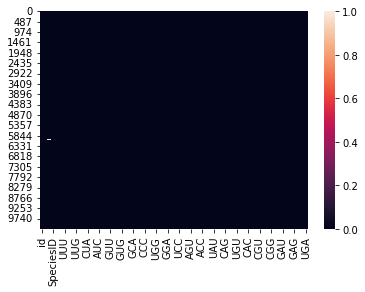

In [5]:
sns.heatmap(df.isna())

From the above graph, we can see that there is a missing value somewhere between the rows 5844 and 6331. We will remove that and see for further faults in the dataframe.

In [6]:
df[df.DNAtype.isna()]

,id,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
6021,6022,mam,NaN,213657,2964,mitochondrion Elephantulus sp. VB001,0.02159,0.03846,0.03138,0.00742,0.02395,0.02362,0.06107,0.0108,0.05263,0.04184,0.04757,0.01046,0.0135,0.01282,0.02092,0.00472,0.01451,0.02733,0.02395,0.00067,0.01383,0.01822,0.02126,0.00034,0.00169,0.01484,0.01586,0.02126,0.00843,0.01282,0.01721,0.03003,0.00135,0.00439,0.01012,0.02024,0.02733,0.02901,0.00304,0.01383,0.01957,0.01788,0.00304,0.01451,0.03003,0.00236,0.00405,0.01012,0.01417,0.02159,0.00101,0.00472,0.00337,0.00843,0.00034,0.0,0.00034,0.00641,0.0135,0.01923,0.00371,0.00202,0.00101,0.02429


We can remove the row as there is just one row with a null value.

In [7]:
df.dropna(inplace = True)

The columns `UUU` and `UUC` should be of type float64 but are of type object. This basically means there are terms that are not of the float type in the column. We need to look for these error entries and handle them before modelling them. 

In [9]:
def check_val(x):
    '''
    This function is used to check if the values inside a column is a list or not
    Parameters:
    x -> Element from a column
    '''
    try:
        float(x)
        return True
    except:
        return False

In [10]:
df = df[df.UUU.apply(lambda x: check_val(x))].reset_index(drop = True)
df = df[df.UUC.apply(lambda x: check_val(x))].reset_index(drop = True)
df.UUU = df.UUU.astype('float')
df.UUC = df.UUC.astype('float')
df = df[(df.Ncodons > 1000) & (df.DNAtype < 3)]

Now that we have transformed the data, let us remove all the columns that aren't going to be useful in modelling.

# Data Visualization & Exploration

We first need to look at the total number of instances for each DNA type. From the below figur, we can see that the DNAtype `0` covers 72% of the data while `1` covers 22% of the data and `2` covers 6% of the data.

In [11]:
fig = px.histogram(x = df.DNAtype.astype('str'), text_auto = True)
fig.update_layout(bargap = 0.3)
fig.show()

Now, let us look at the distribution of the number of instances for each Kingdom. As per the below graph, the attributes are unevenly distributed.

In [12]:
fig = px.histogram(x = df.Kingdom.astype('str'), text_auto = True)
fig.update_layout(bargap = 0.3)
fig.update_xaxes(categoryorder='array', categoryarray= ['bct', 'vrl', 'pln', 'vrt', 'inv', 'mam', 'phg', 'rod', 'pri', 'arc', 'plm'])
fig.show()

Let us first look if the Kingdoms just belong to a particular DNAtype. If this is true, there is no need of any Machine Learning algorithm and we can give the predictions of everything with just this one column.

In [13]:
fig = px.histogram(x = df.DNAtype.astype('str'), color = df.Kingdom.astype('str'))
fig.update_layout(bargap = 0.3)
fig.show()

In the above figure, except for DNAtype 2, there is no clear definition for anyother thing. For this purpose, we do need a Machine Learning algorithm that tries to find the pattern based on other columns.

Now that we know the distribution of our DNAtype's, we are going to check if these alone can be used to predict our target i.e. `Kingdom`. Looking at the graph below, the main conclusion that we come up with is that all the `most of the data points with DNAtype as 2 belongs to the kingdom pln and there are some in the class vrt and inv`. Other notable things from the below graph are that,

<ul>
    <li> DNAtype 0 can be seen in all of the kingdoms </li>
    <li> Kingdoms `vrl, bct, arc, phg, and plm` consists only of DNAtype 0 </li>
    <li> `pln, inv, and vrt` are three Kindoms with all the DNAtype's </li>
</ul>

In [14]:
fig = px.histogram(x = df.Kingdom.astype('str'), color = df.DNAtype.astype('str'), text_auto = True)
fig.update_layout(bargap = 0.3)
fig.show()

In [21]:
# Converting each DNAtype into separate columns
df = df.join(pd.get_dummies(df.DNAtype.astype('int'), drop_first = True, prefix = 'DNAtype_'))
test = test.join(pd.get_dummies(test.DNAtype.astype('int'), drop_first = True, prefix = 'DNAtype_'))

In [22]:
# Removing all the columns that are of no further use to us.
# We are also removing the Species Name column as the name carries some hidden information about the Kingdom but this is not our intention.

df.drop(['SpeciesName', 'SpeciesID', 'id'], axis = 1, inplace = True)
test.drop(['SpeciesName', 'SpeciesID', 'id'], axis = 1, inplace = True)

# Data Modeling

Now that we have understood the data much better, let us try to fit in some Machine Learning models that makes more sense.

In [23]:
x, y = df.drop('Kingdom', axis = 1), df.Kingdom

Normalizing the training and testing dataset.

In [24]:
x = (x - x.mean()) / x.std()
test = (test - test.mean()) / test.std()

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)

We have used the `Dummy Classifier` from the sklearn library as our baseline model

In [31]:
baseline_model = DummyClassifier()
baseline_model.fit(x_train, y_train)

baseline_predictions = baseline_model.predict(x_val)

print(classification_report(y_val, baseline_predictions))

print('Accuracy', accuracy_score(y_val, baseline_predictions))

              precision    recall  f1-score   support

         arc       0.00      0.00      0.00        23
         bct       0.23      1.00      0.37       463
         inv       0.00      0.00      0.00       213
         mam       0.00      0.00      0.00        90
         phg       0.00      0.00      0.00        36
         plm       0.00      0.00      0.00         4
         pln       0.00      0.00      0.00       404
         pri       0.00      0.00      0.00        21
         rod       0.00      0.00      0.00        34
         vrl       0.00      0.00      0.00       458
         vrt       0.00      0.00      0.00       279

    accuracy                           0.23      2025
   macro avg       0.02      0.09      0.03      2025
weighted avg       0.05      0.23      0.09      2025

Accuracy 0.22864197530864197


Now that we have a baseline accuracy to beat, we will be implementing other more complex machine learning algorithms to predict the target better. 

First, we will implement a `Random Forst Classifier model`.

In [40]:
rf = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', max_depth = 35).fit(x_train, y_train)
rf_preds = rf.predict(x_val)

print(classification_report(rf_preds, y_val))

print('Random Forest Accuracy Score:', accuracy_score(rf_preds, y_val))

              precision    recall  f1-score   support

         arc       0.52      1.00      0.69        12
         bct       0.98      0.86      0.92       524
         inv       0.69      0.95      0.80       155
         mam       0.74      0.91      0.82        74
         phg       0.50      0.90      0.64        20
         plm       0.00      0.00      0.00         0
         pln       0.89      0.93      0.91       389
         pri       0.48      0.67      0.56        15
         rod       0.74      0.93      0.82        27
         vrl       0.97      0.88      0.92       504
         vrt       0.97      0.89      0.93       305

    accuracy                           0.89      2025
   macro avg       0.68      0.81      0.73      2025
weighted avg       0.91      0.89      0.90      2025

Random Forest Accuracy Score: 0.8928395061728395


The Random Forest Classifier is doing decent enough with an accuracy of `89.28%`. The mian problem with this model is that, it is not able to predict properly for classes that have very less data point occurrences. 

We will now implement a `k-Nearest Neighbors` model to see if this can be a better model for the data.

We are running it in a loop to check the number of classes to classify it into to get higher accuracy.

In [44]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', algorithm = 'brute', metric = 'cosine')
    knn.fit(x_train, y_train)
    knn_preds = knn.predict(x_val)
    print(i, accuracy_score(y_val, knn_preds))

1 0.9318518518518518
2 0.9318518518518518
3 0.9338271604938272
4 0.9348148148148148
5 0.9298765432098766
6 0.928395061728395
7 0.9244444444444444
8 0.9214814814814815
9 0.9185185185185185
10 0.9180246913580247
11 0.9155555555555556
12 0.9135802469135802
13 0.9116049382716049
14 0.9106172839506173
15 0.9096296296296297
16 0.9076543209876543
17 0.9071604938271605
18 0.9037037037037037
19 0.905679012345679


The model has higher accuracy when the number of neighbours is `4`.

In [45]:
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', algorithm = 'brute', metric = 'cosine')
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_val)
print(classification_report(knn_preds, y_val))
print('KNN Accuracy Score:', accuracy_score(knn_preds, y_val))

              precision    recall  f1-score   support

         arc       0.91      0.91      0.91        23
         bct       0.99      0.94      0.96       487
         inv       0.85      0.95      0.90       192
         mam       0.81      0.87      0.84        84
         phg       0.67      0.83      0.74        29
         plm       0.50      1.00      0.67         2
         pln       0.95      0.95      0.95       403
         pri       0.81      0.61      0.69        28
         rod       0.71      0.73      0.72        33
         vrl       0.96      0.97      0.96       451
         vrt       0.97      0.93      0.95       293

    accuracy                           0.93      2025
   macro avg       0.83      0.88      0.84      2025
weighted avg       0.94      0.93      0.94      2025

KNN Accuracy Score: 0.9348148148148148


The model is working really better compared to the Random Forest Classifier. It understands the smaller classes more better.

The last model that we will be trying now is `XGBoost`. 

In [56]:
rep_string = {
    'arc': 0, 'bct': 1, 'inv':2, 'mam':3, 'phg':4, 'plm':5, 'pln':6, 'pri':7, 'rod':8, 'vrl':9, 'vrt':10
}
y_train = y_train.replace(rep_string)
y_test = y_val.replace(rep_string)

xgb_classifier = xgb.XGBClassifier(eta = 0.25, max_depth = 30)
xgb_classifier.fit(x_train, y_train)
xgb_preds = xgb_classifier.predict(x_val)
print(classification_report(xgb_preds, y_test))
print('XGBoost Accuracy Score:', accuracy_score(xgb_preds, y_test))

              precision    recall  f1-score   support

           0       0.52      0.86      0.65        14
           1       0.97      0.90      0.94       498
           2       0.80      0.93      0.86       183
           3       0.76      0.88      0.81        77
           4       0.50      0.86      0.63        21
           5       0.00      0.00      0.00         0
           6       0.93      0.93      0.93       403
           7       0.62      0.65      0.63        20
           8       0.76      0.87      0.81        30
           9       0.96      0.92      0.94       478
          10       0.98      0.91      0.94       301

    accuracy                           0.91      2025
   macro avg       0.71      0.79      0.74      2025
weighted avg       0.92      0.91      0.92      2025

XGBoost Accuracy Score: 0.9125925925925926


The model gives us an accuracy of `91.26%` and although they are more complex, the KNN model works better and hence I will be retraining it on the whole training dataset and submitting the predictions based on the testign dataset. 

# Final predictions

In [65]:
final_model = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', algorithm = 'brute', metric = 'cosine')
final_model.fit(x, y)
final_model_preds = final_model.predict(test.drop(['DNAtype__3', 'DNAtype__4', 'DNAtype__5', 'DNAtype__6', 'DNAtype__7', 'DNAtype__9', 'DNAtype__12'], axis = 1))

In [ ]:
final_df = pd.DataFrame(columns = ['Kingdom'])
# final_df['id'] = test.id
final_df['Kingdom'] = final_model_preds
final_df.to_csv('submissions.csv', INDEX = False)